In [44]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels.panel.data import PanelData
from linearmodels.panel import PanelOLS, PooledOLS, RandomEffects, compare
import matplotlib.pyplot as plt

In [45]:
def plot_result(result,start_from=1,period=17,insert_index=6,time_start=-7,file_name="result",title="Event Study Coefficients with Confidence Intervals"):
    summary_table=pd.DataFrame(result.summary.tables[1].data[start_from:start_from+period],columns=result.summary.tables[1].data[0])
    new_row=[0]*len(summary_table.columns)
    # insert_index = 4
    summary_table = pd.concat([summary_table.iloc[:insert_index], pd.DataFrame([new_row],columns=summary_table.columns), summary_table.iloc[insert_index:]]).reset_index(drop=True)

    summary_table["Time"]=np.array(list(range(time_start,period+time_start+1)))
    # make each column of summary_table numeric
    summary_table=summary_table.apply(pd.to_numeric, errors='ignore')
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed

    # Plot coefficients as points
    plt.plot(summary_table['Time'], summary_table["Parameter"], 'o-', label='Coefficients', color='b')

    # Plot confidence intervals as error bars
    # plt.errorbar(summary_table['Time'], summary_table["Parameter"],
    #              yerr=[summary_table["Parameter"] - summary_table['Lower CI'],
    #                    summary_table['Upper CI'] - summary_table["Parameter"]],
    #              fmt='none', ecolor='orange', elinewidth=2, capsize=4, label='Confidence Intervals')

    plt.fill_between(summary_table['Time'], summary_table['Lower CI'], summary_table['Upper CI'], color='orange', alpha=0.3, label='Confidence Intervals')

    plt.xlabel('Time')
    plt.ylabel("Parameter")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.savefig("./plots/{}.png".format(file_name),dpi=300,bbox_inches="tight",transparent=False,facecolor="white")
    plt.show()
    # return summary_table

In [46]:
df=pd.read_csv("../../data/merged/len4_ndb_agg_DropNever.csv",encoding="shift-jis",index_col=0)

In [47]:
df=df.loc[df["総計"]>0]
df=df.loc[df["revenue"]>0]
df["log_quantity"]=np.log(df["総計"])
df["log_revenue"]=np.log(df["revenue"])
df_generic=df.copy()
df_branded=df.copy()
df_branded=df_branded.loc[df_branded["後発品区分"]==0]
df_generic=df_generic.loc[df_generic["後発品区分"]==1]
df_branded=df_branded.set_index(["id","year"])
df_generic=df_generic.set_index(["id","year"])
df=df.set_index(["id","year"])
df_branded=PanelData(df_branded,convert_dummies=False)
df_generic=PanelData(df_generic,convert_dummies=False)
df=PanelData(df,convert_dummies=False)

                              Parameter Estimates                              
             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------
elasped_m7     -0.3374     0.1858    -1.8156     0.0699     -0.7024      0.0276
elasped_m6     -0.2396     0.0971    -2.4686     0.0138     -0.4302     -0.0490
elasped_m5     -0.2252     0.0925    -2.4349     0.0152     -0.4068     -0.0436
elasped_m4     -0.1554     0.0409    -3.7974     0.0002     -0.2358     -0.0751
elasped_m3     -0.1697     0.0428    -3.9632     0.0001     -0.2538     -0.0856
elasped_m2     -0.1188     0.0521    -2.2795     0.0230     -0.2212     -0.0164
elasped_0      -0.1082     0.1299    -0.8327     0.4053     -0.3632      0.1469
elasped_1      -0.0228     0.0745    -0.3067     0.7592     -0.1691      0.1234
elasped_2      -0.0427     0.0895    -0.4772     0.6334     -0.2186      0.1331
elasped_3      -0.0617     0.0671    -0.

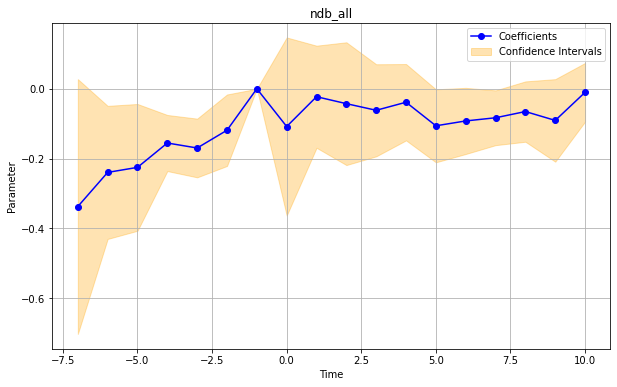

In [48]:
# all data
formula="log_quantity~ elasped_m7+elasped_m6+elasped_m5+elasped_m4+elasped_m3+elasped_m2+elasped_0+elasped_1+elasped_2+elasped_3+elasped_4+elasped_5+elasped_6+elasped_7+elasped_8+elasped_9+elasped_10+TimeEffects+EntityEffects"

# till elasped_20
# formula="log_quantity~ elasped_m7+elasped_m6+elasped_m5+elasped_m4+elasped_m3+elasped_m2+elasped_0+elasped_1+elasped_2+elasped_3+elasped_4+elasped_5+elasped_6+elasped_7+elasped_8+elasped_9+elasped_10+elasped_11+elasped_12+elasped_13+elasped_14+elasped_15+TimeEffects+EntityEffects"


# add generic indicator
formula+="+後発品区分"

# add generic per
formula+="+generic_per"

mod_fe=PanelOLS.from_formula(formula, data=df,check_rank=False,drop_absorbed=True)
res_fe=mod_fe.fit(cov_type='clustered', cluster_entity=True)
print(res_fe.summary.tables[1])
# print(res_fe.summary.tables[0])
# print(res_fe)
# plot_result(res_fe,file_name="ndb_all",title="ndb_all",start_from=1,period=15)
plot_result(res_fe,file_name="ndb_all",title="ndb_all")

                              Parameter Estimates                              
             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------
generic_per     0.2822     0.0009     306.76     0.0000      0.2803      0.2840
elasped_m7     -0.5875     0.3463    -1.6965     0.0910     -1.2695      0.0945
elasped_m6     -0.3133     0.1976    -1.5850     0.1142     -0.7025      0.0760
elasped_m5     -0.4389     0.1853    -2.3688     0.0186     -0.8037     -0.0740
elasped_m4     -0.2363     0.1397    -1.6914     0.0920     -0.5115      0.0388
elasped_m3     -0.3014     0.1351    -2.2303     0.0266     -0.5675     -0.0353
elasped_m2     -0.2103     0.1035    -2.0316     0.0432     -0.4141     -0.0064
elasped_0      -0.1172     0.2060    -0.5689     0.5699     -0.5228      0.2884
elasped_1       0.0277     0.1138     0.2431     0.8081     -0.1965      0.2518
elasped_2      -0.0187     0.1597    -0.

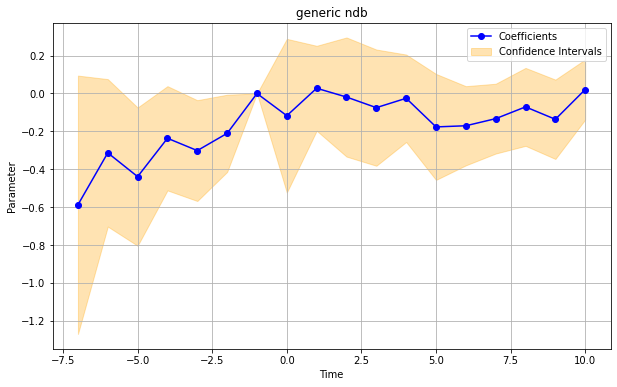

In [51]:
# generic data
formula="log_quantity~generic_per+elasped_m7+elasped_m6+elasped_m5+elasped_m4+elasped_m3+elasped_m2+elasped_0+elasped_1+elasped_2+elasped_3+elasped_4+elasped_5+elasped_6+elasped_7+elasped_8+elasped_9+elasped_10+TimeEffects+EntityEffects"

# till elasped_20
# formula="log_quantity~ elasped_m7+elasped_m6+elasped_m5+elasped_m4+elasped_m3+elasped_m2+elasped_0+elasped_1+elasped_2+elasped_3+elasped_4+elasped_5+elasped_6+elasped_7+elasped_8+elasped_9+elasped_10+elasped_11+elasped_12+elasped_13+elasped_14+elasped_15+TimeEffects+EntityEffects"

# add generic_per
formula+="+generic_per"
mod_fe=PanelOLS.from_formula(formula, data=df_generic,check_rank=False,drop_absorbed=True)
res_fe=mod_fe.fit(cov_type='clustered', cluster_entity=True)
print(res_fe.summary.tables[1])
# print(res_fe.summary.tables[0])
# print(res_fe)
# plot_result(res_fe,file_name="ndb_generic",title="generic ndb",start_from=1,period=15)
plot_result(res_fe,file_name="ndb_generic",title="generic ndb",start_from=2)

                          PanelOLS Estimation Summary                           
Dep. Variable:           log_quantity   R-squared:                        0.0707
Estimator:                   PanelOLS   R-squared (Between):             -0.0685
No. Observations:                 343   R-squared (Within):              -136.84
Date:                Sun, Sep 03 2023   R-squared (Overall):             -2.0513
Time:                        16:16:01   Log-likelihood                    67.170
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      1.2351
Entities:                          43   P-value                           0.2363
Avg Obs:                       7.9767   Distribution:                  F(17,276)
Min Obs:                       7.0000                                           
Max Obs:                       8.0000   F-statistic (robust):          2.845e+08
                            

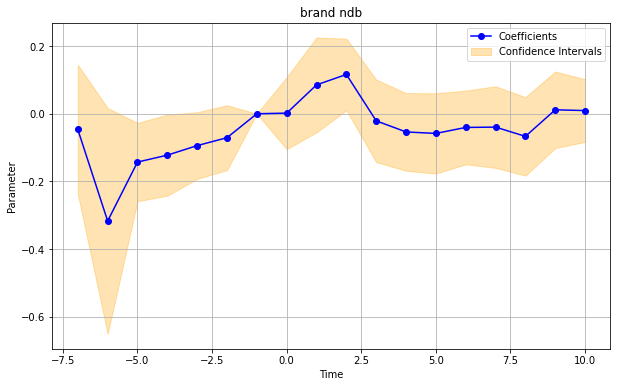

In [52]:
# branded data
formula="log_quantity~ elasped_m7+elasped_m6+elasped_m5+elasped_m4+elasped_m3+elasped_m2+elasped_0+elasped_1+elasped_2+elasped_3+elasped_4+elasped_5+elasped_6+elasped_7+elasped_8+elasped_9+elasped_10+TimeEffects+EntityEffects"

# till elasped_20
# formula="log_quantity~ elasped_m7+elasped_m6+elasped_m5+elasped_m4+elasped_m3+elasped_m2+elasped_0+elasped_1+elasped_2+elasped_3+elasped_4+elasped_5+elasped_6+elasped_7+elasped_8+elasped_9+elasped_10+elasped_11+elasped_12+elasped_13+elasped_14+elasped_15+TimeEffects+EntityEffects"
# add generic_per
formula+="+generic_per"

mod_fe=PanelOLS.from_formula(formula, data=df_branded,check_rank=False,drop_absorbed=True)
res_fe=mod_fe.fit(cov_type='clustered', cluster_entity=True)
# print(res_fe.summary.tables[1])
# print(res_fe.summary.tables[0])
print(res_fe)
# plot_result(res_fe,file_name="ndb_brand",title="brand ndb",start_from=1,period=15)
plot_result(res_fe,file_name="ndb_brand",title="brand ndb")
